# Fundamentals of Machine Learning

In [2]:
# modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# color pallete

c_map = {
    'red': '#ff6188',
    'orange': '#fc9867',
    'yellow': '#ffd866',
    'green': '#a8dd76',
    'blue': '#78dce8',
    'purple': '#ac9df2',
    'grey': '#2c2a2e',
    'white': '#fcfcfa',
    'black': '#211f22' 
}

# global params
matplotlib.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.facecolor'] = c_map['black']
plt.rcParams['axes.facecolor'] = c_map['black']
plt.rcParams['text.color'] = c_map['white']
plt.rcParams['axes.labelcolor'] = c_map['white']
plt.rcParams['xtick.color'] = c_map['white']
plt.rcParams['ytick.color'] = c_map['white']

## Data Generation

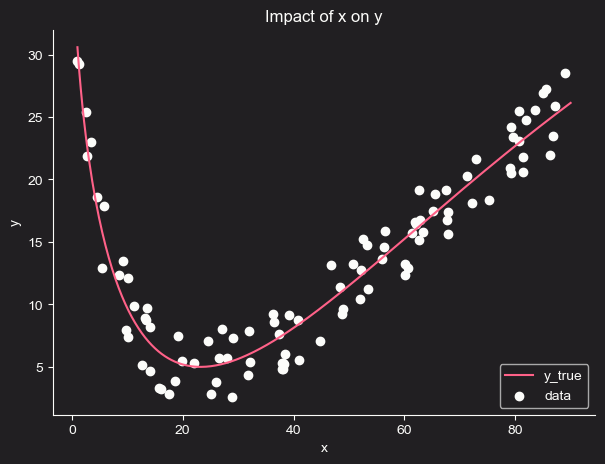

In [3]:
np.random.seed(1)
n_samples = 100

x_sample = np.sort(np.random.uniform(low=1, high=90, size=n_samples))
y_noise = np.random.uniform(low=-3, high=3, size=n_samples)
y_sample = -20*np.sin(x_sample**(1/3) + 5) + 25 + y_noise

x = np.linspace(start=1, stop=90, num=300)
y_true = -20*np.sin(x**(1/3) + 5) + 25

# graph of data
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, y_true, c=c_map['red'], label='y_true')
ax.scatter(x_sample, y_sample, c=c_map['white'], label='data')

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_map['white'])
ax.set_title('Impact of x on y')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower right');

In [ ]:
def train_test_split(X, y, p_train=0.6, get_index=False):
    n = X.shape[0]
    sample_indicies = np.arange(0, n)
    
    train_mask = np.random.choice(sample_indicies, size=int(p_train * n), replace=False)
    test_mask = sample_indicies[~np.isin(sample_indicies, train_mask)]
    
    if get_index:
        return X[train_mask], y[train_mask], X[test_mask], y[test_mask], train_mask, test_mask
    
    return X[train_mask], y[train_mask], X[test_mask], y[test_mask]

In [5]:
np.random.seed(1)
x_train, y_train, _x, _y, train_mask, _ = train_test_split(x_sample, y_sample, 0.6, get_index=True)
x_cv, y_cv, x_test, y_test, cv_mask, test_mask = train_test_split(_x, _y, 0.5, get_index=True) 

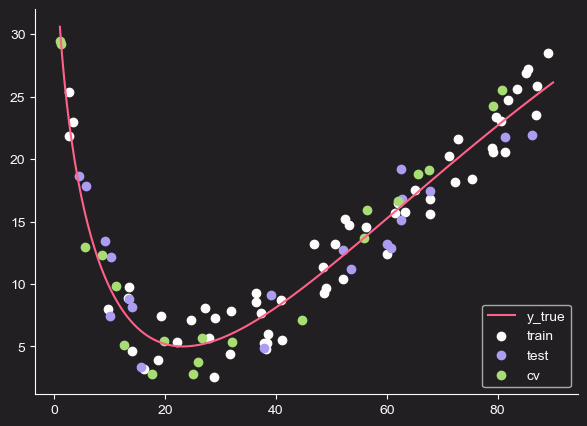

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, y_true, c=c_map['red'], label='y_true')
ax.scatter(x_train, y_train, c=c_map['white'], label='train')
ax.scatter(x_test, y_test, c=c_map['purple'], label='test')
ax.scatter(x_cv, y_cv, c=c_map['green'], label='cv')


ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_map['white'])
ax.legend(loc='lower right');

linear regression (lr)
* define model
* define loss
* define cost function
* gradient descent
* diagnostic -> add a feature

* bias and variance with different degrees

## Linear Regression

The prediction function is:
$$f(\vec{x}) = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$
$$f(\vec{x}) = \vec{w}^T\vec{x} + b$$

The loss for each observation is defined as:
$$l(w,\vec{x_i}) = (f(\vec{x_i}) - y_i)^2$$
Cost function will be MSE:
$$L(w,X) = \frac{1}{2m}\sum^{m - 1}_{i = 0}l(w,\vec{x_i})$$
The constant $2m$ is used instead of $m$ for gradient function to be simple. The affect of dividing by $2$ does not impact the algorithm's inference accuracy.

In [ ]:
def lr_predict(w, X):
    """
    parameter:
        w: (n,) learned weight values
        X: (m, n) each row represents observation 
    
    return:
        X @ w: (m, ) dot product of each observation
    """
    return X @ w

In [16]:
def total_cost(y_hat, y):
    return np.sum((y_hat - y)**2)/(2*y.shape[0])

### Gradient Descent

The cost function expanded:
$$L(w,X) = \frac{1}{2m}\sum^{m - 1}_{i = 0}(w_1x_{i1} + w_2x_{i2} + ... + w_nx_{in} + b - y_i)^2$$

Inorder to implement gradient descent, the the partial derivative w.r.t each variable must be defined:

$$\frac{dL}{dx_j} = \frac{1}{m}\sum^{m - 1}_{i = 0}(\vec{w}^T\vec{x_i} + b - y_i)x_{ij}$$
$$\frac{dL}{db} = \frac{1}{m}\sum^{m - 1}_{i = 0}(\vec{w}^T\vec{x_i} + b - y_i)$$

Gradient is defined as:
$$\nabla\vec{L} = \begin{pmatrix}
\frac{dL}{dx_1}\\\\
\frac{dL}{dx_2} \\ \\
.\\
.\\
. \\ \\
\frac{dL}{dx_n} \\
\end{pmatrix}$$

along with $\frac{dL}{db}$

In [ ]:
def compute_gradient(w, b, g, eta=0.01):
    """
    return gradient of weights, dL_db
    """

    

logistic regression

hyperparameter tuning (cv_cost & train_cost) -> pick minimum cv_cost